In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from ggplot import mtcars
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import r2_score

In [65]:
df = pd.DataFrame(mtcars)

In [66]:
print df.iloc[:1,6:7]
df.head()

     wt
0  2.62


,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


c:\python27\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

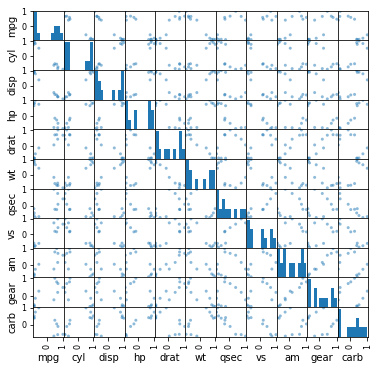

In [67]:
pd.scatter_matrix(df.corr(), figsize=(6, 6))
print df.corr()
plt.show()

In [68]:
print df.mpg.value_counts().head(5)

print df.mpg.describe()

10.4    2
21.4    2
30.4    2
22.8    2
15.2    2
Name: mpg, dtype: int64
count    32.000000
mean     20.090625
std       6.026948
min      10.400000
25%      15.425000
50%      19.200000
75%      22.800000
max      33.900000
Name: mpg, dtype: float64


In [127]:
x= df.iloc[:,6:7].values
print x.shape
y = df.mpg.values
print y.shape

(32, 1)
(32,)


In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35)

In [129]:
lm=LinearRegression()

In [130]:
lm.fit(x_train,y_train)
predict = lm.predict(x_test)

Text(0,0.5,u'Mpg')

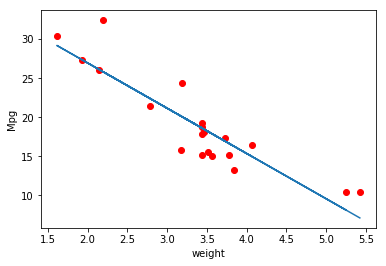

In [131]:
plt.scatter(x_train,y_train,c= 'red')
plt.plot(x_train, lm.predict(x_train))
plt.xlabel("weight")
plt.ylabel("Mpg")

Text(0,0.5,u'Mpg')

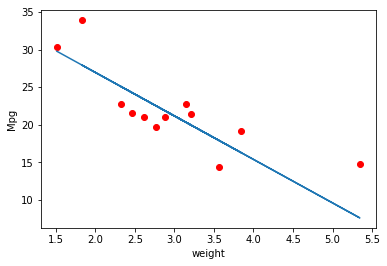

In [132]:
plt.scatter(x_test,y_test,c= 'red')
plt.plot(x_test, lm.predict(x_test))
plt.xlabel("weight")
plt.ylabel("Mpg")

In [133]:
print  np.array(predict)
print y_test

[ 29.77827239   7.57481263  21.88654165  16.26614604  27.91253281
  23.36406833  19.91650607  20.29313052  22.49493499  25.10233501
  24.26217278  17.85955717]
[ 30.4  14.7  21.   19.2  33.9  21.   21.4  22.8  19.7  22.8  21.5  14.3]


In [134]:
r2=r2_score(y_test,predict)
print r2

0.578828465437


In [135]:
est = sm.OLS(y, x)

In [136]:
e=est.fit()
print e.summary()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     79.58
Date:                Sat, 16 Dec 2017   Prob (F-statistic):           4.55e-10
Time:                        12:53:20   Log-Likelihood:                -122.40
No. Observations:                  32   AIC:                             246.8
Df Residuals:                      31   BIC:                             248.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             5.2916      0.593      8.921      0.0

In [183]:
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
x= df.iloc[:,4:7].values

print x.shape
y = df.mpg.values
y=y.reshape(32,1)
print y.shape
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.35)
le=LabelEncoder()
#x_train=le.fit_transform(x_train)
#y_train = le.fit_transform(y_train)

print(utils.multiclass.type_of_target(x_train))
x_train=x_train.reshape(-1,1)
print x_train
print y_train

(32, 3)
(32, 1)
continuous-multioutput
[[ 215.   ]
 [   3.   ]
 [   5.424]
 [  97.   ]
 [   3.7  ]
 [   2.465]
 [ 205.   ]
 [   2.93 ]
 [   5.25 ]
 [ 335.   ]
 [   3.54 ]
 [   3.57 ]
 [ 110.   ]
 [   3.9  ]
 [   2.875]
 [  66.   ]
 [   4.08 ]
 [   2.2  ]
 [  95.   ]
 [   3.92 ]
 [   3.15 ]
 [ 150.   ]
 [   2.76 ]
 [   3.52 ]
 [ 180.   ]
 [   3.07 ]
 [   3.73 ]
 [ 264.   ]
 [   4.22 ]
 [   3.17 ]
 [  91.   ]
 [   4.43 ]
 [   2.14 ]
 [ 180.   ]
 [   3.07 ]
 [   4.07 ]
 [  52.   ]
 [   4.93 ]
 [   1.615]
 [  65.   ]
 [   4.22 ]
 [   1.835]
 [ 109.   ]
 [   4.11 ]
 [   2.78 ]
 [ 180.   ]
 [   3.07 ]
 [   3.78 ]
 [ 150.   ]
 [   3.15 ]
 [   3.435]
 [ 175.   ]
 [   3.62 ]
 [   2.77 ]
 [ 175.   ]
 [   3.15 ]
 [   3.44 ]
 [ 123.   ]
 [   3.92 ]
 [   3.44 ]]
[[ 10.4]
 [ 21.5]
 [ 10.4]
 [ 15. ]
 [ 21. ]
 [ 32.4]
 [ 22.8]
 [ 15.5]
 [ 17.3]
 [ 15.8]
 [ 26. ]
 [ 16.4]
 [ 30.4]
 [ 33.9]
 [ 21.4]
 [ 15.2]
 [ 15.2]
 [ 19.7]
 [ 18.7]
 [ 19.2]]


In [184]:
clr = svm.SVC()

In [185]:
clr.fit(x_train,y_train)

c:\python27\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [60, 20]

In [181]:
y_train

array([ 7,  2,  5,  6, 13,  9, 11,  8, 10, 14, 16,  4,  8,  0, 15,  1,  9,
       12,  3, 15])